In [4]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import copy
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#!pip install PyPortfolioOpt

In [6]:
#!pip install Plotly

In [7]:
stocks_df = pd.read_csv('/Users/avvishnuvardhanreddy/Documents/My_Learning/COLG/SEM 3/Financial Analytics/small_portfolio.csv')
stocks_df.head()

,date,GE,JPM,MSFT,PG
0,02-01-2015,25.06,62.49,46.760,90.44
1,05-01-2015,24.60,60.55,46.325,90.01
2,06-01-2015,24.07,58.98,45.650,89.60
3,07-01-2015,24.08,59.07,46.230,90.07
4,08-01-2015,24.37,60.39,47.590,91.10


In [8]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    813 non-null    object 
 1   GE      813 non-null    float64
 2   JPM     813 non-null    float64
 3   MSFT    813 non-null    float64
 4   PG      813 non-null    float64
dtypes: float64(4), object(1)
memory usage: 31.9+ KB


In [9]:
stocks_df.set_index('date', drop=True, inplace=True)
stocks_df

,GE,JPM,MSFT,PG
date,,,,
02-01-2015,25.06,62.49,46.760,90.44
05-01-2015,24.60,60.55,46.325,90.01
06-01-2015,24.07,58.98,45.650,89.60
07-01-2015,24.08,59.07,46.230,90.07
08-01-2015,24.37,60.39,47.590,91.10
...,...,...,...,...
21-03-2018,13.88,114.74,92.480,77.04
22-03-2018,13.35,109.95,89.790,76.41
23-03-2018,13.07,107.01,87.180,75.91


In [10]:
fig_price = px.line(stocks_df, title='Price of Individual Stocks')
fig_price.show()

In [11]:
daily_returns = stocks_df.pct_change().dropna()
daily_returns.head()

,GE,JPM,MSFT,PG
date,,,,
05-01-2015,-0.018356,-0.031045,-0.009303,-0.004755
06-01-2015,-0.021545,-0.025929,-0.014571,-0.004555
07-01-2015,0.000415,0.001526,0.012705,0.005246
08-01-2015,0.012043,0.022346,0.029418,0.011436
09-01-2015,-0.013952,-0.017387,-0.008405,-0.009330


In [12]:
fig = px.line(daily_returns[['GE', 'JPM']], title='Daily Returns')
fig.show()

In [13]:
daily_returns.std()

GE      0.013563
JPM     0.013662
MSFT    0.014704
PG      0.009087
dtype: float64

(-0.1, 0.1)

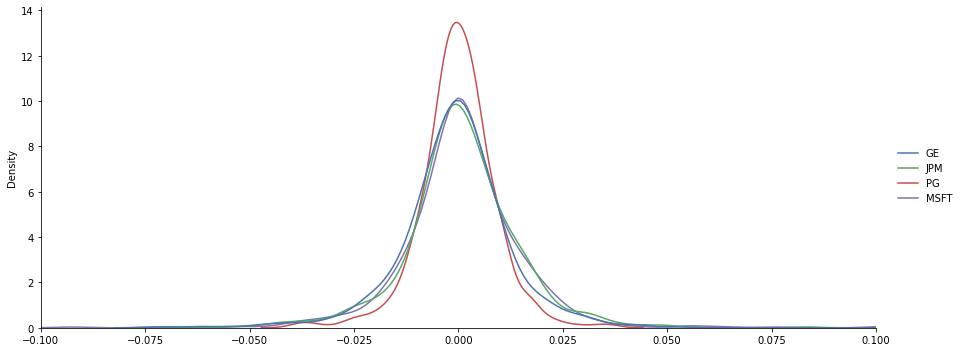

In [14]:
sns.displot(data=daily_returns[['GE', 'JPM','PG','MSFT']], kind = 'kde', aspect = 2.5)
plt.xlim(-0.1, 0.1)

In [15]:
def plot_cum_returns(data, title):    
    daily_cum_returns = 1 + data.dropna().pct_change()
    daily_cum_returns = daily_cum_returns.cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig
    
fig_cum_returns = plot_cum_returns(stocks_df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()

In [16]:
corr_df = stocks_df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

In [17]:
mu = expected_returns.mean_historical_return(stocks_df)
S = risk_models.sample_cov(stocks_df)
print(mu)

GE     -0.175812
JPM     0.185643
MSFT    0.223083
PG     -0.045684
dtype: float64


In [18]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe(risk_free_rate=0.02)
weights = ef.clean_weights()
print(weights)

OrderedDict([('GE', 0.0), ('JPM', 0.4252), ('MSFT', 0.5748), ('PG', 0.0)])


In [19]:
weights_df = pd.DataFrame.from_dict(weights, orient = 'index')
weights_df.columns = ['weights']
weights_df

,weights
GE,0.0000
JPM,0.4252
MSFT,0.5748
PG,0.0000


In [20]:
expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance()
print('Expected annual return: {}%'.format((expected_annual_return*100).round(2)))
print('Annual volatility: {}%'.format((annual_volatility*100).round(2)))
print('Sharpe ratio: {}'.format(sharpe_ratio.round(2)))

Expected annual return: 20.72%
Annual volatility: 19.6%
Sharpe ratio: 0.96


In [21]:
stocks_df['Optimized Portfolio'] = 0
for ticker, weight in weights.items():
    stocks_df['Optimized Portfolio'] += stocks_df[ticker]*weight
stocks_df.head()

,GE,JPM,MSFT,PG,Optimized Portfolio
date,,,,,
02-01-2015,25.06,62.49,46.760,90.44,53.448396
05-01-2015,24.60,60.55,46.325,90.01,52.373470
06-01-2015,24.07,58.98,45.650,89.60,51.317916
07-01-2015,24.08,59.07,46.230,90.07,51.689568
08-01-2015,24.37,60.39,47.590,91.10,53.032560


In [22]:
fig_cum_returns_optimized = plot_cum_returns(stocks_df['Optimized Portfolio'], 'Cumulative Returns of Optimized Portfolio Starting with $100')
fig_cum_returns_optimized.show()